####   <center> ZTH COHORT 7.0 FINAL PROJECT 2 Nyong Godwill Nkwain</center> 
  ##### <center>Project 2: Market Sales Prediction Model</center>

##### 1. Importing  libraries

In [235]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;
##machine learning imports
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import cross_val_score;
from sklearn.linear_model import LinearRegression;
from sklearn.svm import SVR;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.metrics import root_mean_squared_error;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;





In [236]:
## loading data set
df = pd.read_csv('C:/Users/Godwill/Downloads/Data Analyst/Zion Tech/project/solution/project 2/supermarket_sales new.csv')
df.head()

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


## Objective

Develop a machine learning regression model to predict market sales using historical data. The
goal is to generate actionable insights for business planning, inventory management, and marketing strategy.

## Business Problem

• Forecasting market sales can help businesses better allocate resources, adjust inventory levels,
and design effective marketing campaigns.
• Understanding the key factors driving sales will also empower decision-makers to plan for future growth.

## About Dataset

### Context
The Supermarket Sales Dataset provides a comprehensive overview of supermarket transactions, tracking details such as product categories, unit prices, quantities sold, and gross income. It also includes customer demographics, such as gender, payment method, and membership type. This dataset is ideal for analyzing sales trends, customer behavior, and revenue performance, offering insights to optimize promotions and product strategies.


### Column Descriptions:

1. Invoice ID: A unique identifier for each transaction.
2. Branch: The specific supermarket branch (e.g., A, B, C).
3. City: The city where the branch is located.
4. Customer Type: Indicates if the customer is a "Member" or "Normal."
5. Gender: Customer's gender for demographic insights.
6. Product Line: Product category (e.g., Groceries, Clothing).
7. Unit Price: Price per product unit.
8. Quantity: Units bought in a transaction.
9. Tax (5%): Tax amount (5% of the total before tax).
10. Total: Total paid, including tax.


In [237]:
df = pd.read_csv("supermarket_sales new.csv")
df.head()


,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [238]:
# over view of Columns and data types
df.info()
# Checking our data size
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


(1000, 9)

In [239]:
# Checking for null values 
df.isnull().sum()

Gender           0
Invoice ID       0
Branch           0
City             0
Customer type    0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
dtype: int64

### Exploratory Data Analysis

In [240]:
df.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


- From the above, it shows that the average unit price of is 55.67 with an average quantity of 5.5.
- The Max Unit Price is 99.96 and a max quantity of 10.0.

In [241]:
df.describe(include='object')

,Gender,Invoice ID,Branch,City,Customer type,Product line
count,1000,1000,1000,1000,1000,1000
unique,2,1000,3,3,2,6
top,Female,750-67-8428,A,Yangon,Member,Fashion accessories
freq,501,1,340,340,501,178


- From the above the top product purchase is Fashion accessories which is mostly requested by females with a frequency of 501
- Out of the 3 city Yangon is top purchasing city with a frequency of 340.




##### Checking for data types

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


<h4>Visualized our target variable with featured variables</h4>


<Axes: xlabel='Customer type', ylabel='Unit price'>

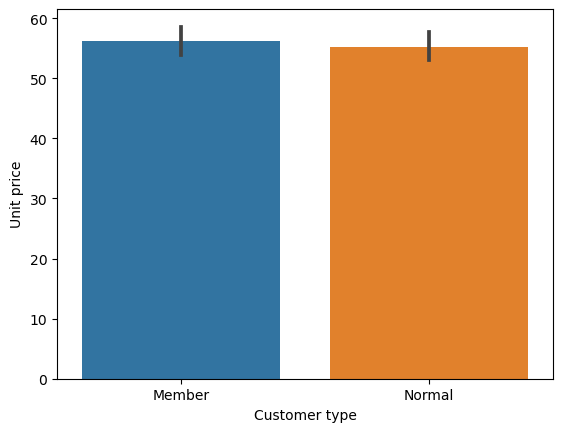

In [243]:
# Customer vs Unit Sales

sns.barplot(x=df['Customer type'], y=df['Unit price'], data=df)

###### Useful insights
- From the plot above, both the Member and Normal customer type have a unit price of 55 for Member and 54 for Normal customer.
- We can conclusively say that the customer type doesn't really affect the market price


In [244]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [245]:
# Product line vs unit price
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [246]:
type = df['Product line'].value_counts()
product = type.index
quantity = type.values

figure = px.pie(df, 
             values=quantity, 
             names=product,hole = 0.5, 
             title="Distribution of product")
figure.show()

In [247]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='Unit price'>

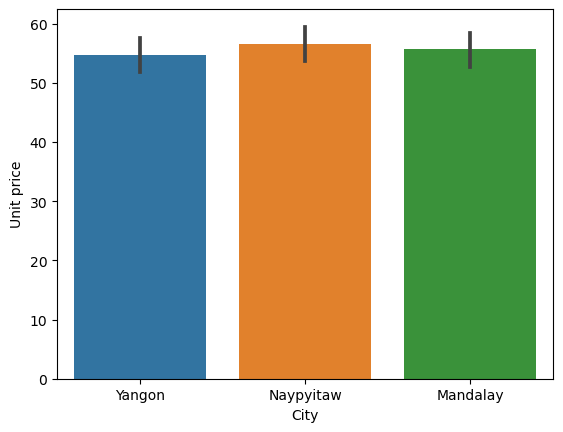

In [248]:
sns.barplot(data=df, x=df['City'], y=df['Unit price'])

### Machine Learning

#### Encoding Categorical Variables

In [249]:
#dropping irrelevant columns such as invoice id we have
df1 = df.drop(['Invoice ID'], axis=1)


In [250]:

df1.head()


,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [251]:
# # defining a function to encode the categorical variable we have:
# def label_encoder(x):
#     le = LabelEncoder()
#     df1[x]=le.fit_transform(df1[x])
    
# # creating a list of our categorical variables we have
# label_list = ['Gender', 'Branch', 'Customer type', 'Product line', 'City']

# #looping and encoding our list we have:
# for i in label_list:
#     label_encoder(i)

def label_encoder(df, x, encoders):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])
    encoders[x] = le  # Store the fitted encoder in the dictionary

# creating a list of our categorical variables we have
label_list = ['Gender', 'Branch', 'Customer type', 'Product line', 'City']

# Initialize a dictionary to store the LabelEncoder objects
label_encoders = {}

#looping and encoding our list we have:
for i in label_list:
    label_encoder(df1, i, label_encoders)




In [252]:
#displaying our transform data we have:
df1.head()

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,0,0,2,0,3,74.69,7,261.415
1,0,2,1,1,0,15.28,5,3.820
2,0,0,2,0,0,68.84,6,20.652
3,0,2,1,1,4,73.56,10,36.780
4,0,0,2,0,3,36.26,2,3.626


### Splitting our data

In [253]:
# Here we split the data into training and testing sets

#Dividing out data into independent and dependent variables we have
X = df1.drop(['Unit price'], axis=1)
y= df1['Unit price']

#Splitting our data into training and testing 
# Dedicating 20% of the data to be testing and 80% for training we have

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train
X_test

X_train Shape: (800, 7)
X_test Shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)


,Gender,Branch,City,Customer type,Product line,Quantity,Tax 5%
37,0,0,2,0,1,9,9.1945
726,1,2,1,0,5,4,16.5860
846,1,1,0,0,1,2,8.3770
295,0,1,0,1,5,6,16.3530
924,1,0,2,1,1,3,7.7910
...,...,...,...,...,...,...,...
839,1,1,0,0,1,4,12.0360
810,1,0,2,1,1,1,1.5305
930,1,2,1,1,3,7,186.1650
616,1,1,0,1,5,3,6.9630


### Standardizing Our Data

In [254]:
# Here we carry out feature scaling using the sklearn library StandardScaler.
# Feature scaling

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)


## Implementing Our Classification Models
- We will build 5 different models and compare their RMSE, MSE and R-Square

In [255]:
# we create two dictionaries to store the results of our models
result_dic_R_square = {}
result_dic_mse = {}
result_dic_rmse = {}

### Implementing linear regression

In [256]:
## Model Training
model = LinearRegression();
model.fit(X_train_scaled, y_train);
y_pred = model.predict(X_test_scaled);

In [257]:
## Evaluating our model:

score = r2_score(y_test, y_pred);
mse = mean_squared_error(y_test, y_pred);
rmse = root_mean_squared_error(y_test, y_pred);

print('R-Square', score)
print('Mean Square Error', mse)
print('Root Mean Square Error', rmse)

R-Square 0.035766946656774046
Mean Square Error 667.6431833289301
Root Mean Square Error 25.838792218850518


In [258]:
#Adding the result in our dictionaries we have:
result_dic_R_square["Linear Regression"]=score;
result_dic_mse["Linear Regression"]=mse
result_dic_rmse["Linear Regression"]=rmse

### Implementing Random Forest Regressor

In [259]:
# model training
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train);
rf_pred = rf.predict(X_test_scaled);

In [260]:
## Evaluating our model:

r_square = r2_score(y_test, rf_pred);
mse1 = mean_squared_error(y_test, rf_pred);
rmse2 = root_mean_squared_error(y_test, rf_pred);

print('R-Square', r_square)
print('Mean Square Error', mse1)
print('Root Mean Square Error', rmse2)

R-Square 0.871049925513554
Mean Square Error 89.28613048694996
Root Mean Square Error 9.449133848504314


In [261]:
#Adding the result in our dictionaries we have:
result_dic_R_square["Random Forest Regressor"]=r_square;
result_dic_mse["Random Forest Regressor"]=mse1
result_dic_rmse["Random Forest Regressor"]=rmse2

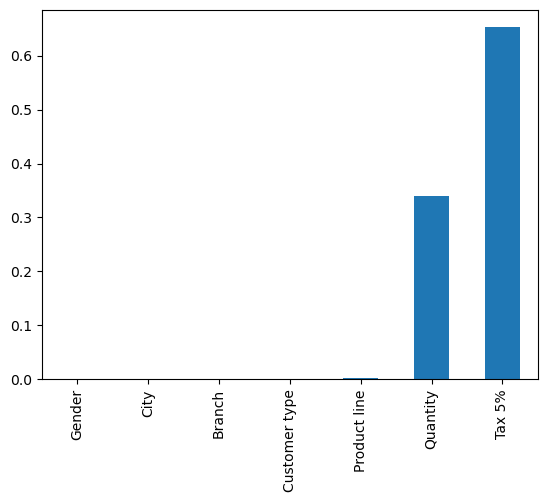

In [262]:
model_ranks=pd.Series(rf.feature_importances_,index=X_train.columns,name="Importance").sort_values(ascending=True,inplace=False)
ax=model_ranks.plot(kind='bar')

### Implementing Decision Tree Regressor

In [263]:
# Model Training
dt = DecisionTreeRegressor(splitter='best');
dt.fit(X_train_scaled,y_train);
dt_pred = dt.predict(X_test_scaled);

In [264]:
## Evaluating our model:

dt_square = r2_score(y_test, dt_pred);
mse2 = mean_squared_error(y_test, dt_pred);
rmse3 = root_mean_squared_error(y_test, dt_pred);

print('R-Square', dt_square)
print('Mean Square Error', mse2)
print('Root Mean Square Error', rmse3)

R-Square 0.7192548469240243
Mean Square Error 194.39033650000005
Root Mean Square Error 13.942393499682902


In [265]:
#Adding the result in our dictionaries we have:
result_dic_R_square["Decision Tree Regressor"]=dt_square;
result_dic_mse["Decision Tree Regressor"]=mse2
result_dic_rmse["Decision Tree Regressor"]=rmse3

### Implementing Support Vector Regression

In [266]:
# Model Training
sr = SVR();
sr.fit(X_train_scaled, y_train);
sr_pred = sr.predict(X_test_scaled);

In [267]:
## Evaluating our model:

sr_square = r2_score(y_test, sr_pred);
mse3 = mean_squared_error(y_test, sr_pred);
rmse4 = root_mean_squared_error(y_test, sr_pred);

print('R-Square', sr_square)
print('Mean Square Error', mse3)
print('Root Mean Square Error', rmse4)

R-Square 0.05787507977744344
Mean Square Error 652.3353235506682
Root Mean Square Error 25.54085596746257


In [268]:
#Adding the result in our dictionaries we have:
result_dic_R_square["Support Vector Regressor"]=sr_square;
result_dic_mse["Support Vector Regressor"]=mse3
result_dic_rmse["Support Vector Regressor"]=rmse4

### Implementing Gradient Boosting Regression

In [269]:
# Training the model
gb = GradientBoostingRegressor(loss='huber', n_estimators=200)
gb.fit(X_train_scaled, y_train);
gb_pred = gb.predict(X_test_scaled);

In [270]:
## Evaluating our model:

gb_square = r2_score(y_test, gb_pred);
mse4 = mean_squared_error(y_test, gb_pred);
rmse5 = root_mean_squared_error(y_test, gb_pred);

print('R-Square', gb_square)
print('Mean Square Error', mse4)
print('Root Mean Square Error', rmse5)

R-Square 0.8190768747640439
Mean Square Error 125.27271374024923
Root Mean Square Error 11.192529371873421


In [271]:
#Adding the result in our dictionaries we have:
result_dic_R_square["Gradient Boosting Regressor"]=gb_square;
result_dic_mse["Gradient Boosting Regressor"]=mse4
result_dic_rmse["Gradient Boosting Regressor"]=rmse5

### Model Evaluation:

In [272]:
# R-Square for different model
df1_result_R_square = pd.DataFrame.from_dict(result_dic_R_square, orient = "index", columns=["R-Square"])

# Adding columns for our model name
df1_result_R_square.index.name = "Model";

# Reset the index, bringing the model names into a regular column
df1_result_R_square = df1_result_R_square.reset_index();
df1_result_R_square


,Model,R-Square
0,Linear Regression,0.035767
1,Random Forest Regressor,0.871050
2,Decision Tree Regressor,0.719255
3,Support Vector Regressor,0.057875
4,Gradient Boosting Regressor,0.819077


#### Visualizing our model we have

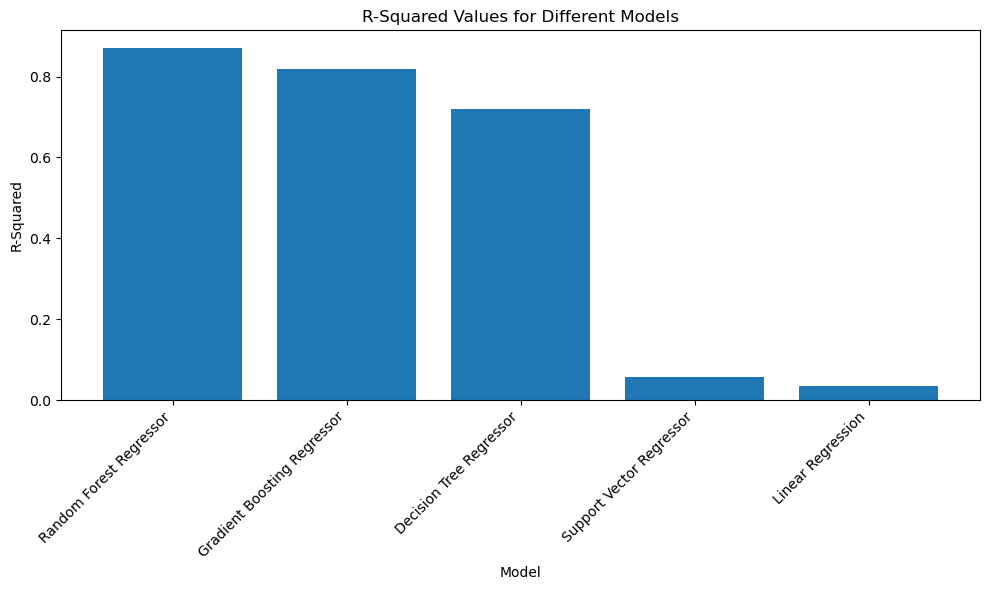

In [273]:
df1_result_R_square = df1_result_R_square.sort_values(by="R-Square", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df1_result_R_square["Model"], df1_result_R_square["R-Square"])
plt.xlabel("Model")
plt.ylabel("R-Squared")
plt.title("R-Squared Values for Different Models")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout() 

##### Exporting the model for deployment

In [274]:
import pickle

with open('rf_model.sav', 'wb') as f:
    pickle.dump(rf, f)
    
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

#### Possible Recommendations:
- Fashion accessories is the top purchase product, the company should invest more on them with more focus on female Fashion Accessories
- Branch A is the top in the list of the company branches, more investment can be done there while implement the business model to other branches
- More shops can be open in Yangon City since it is the city with high purchase 